# Computer Pointer Controller

## Overview
In this notebook, we will request an **IEI Tank-870** edge node and run inference on the different hardware types (CPU, GPU, VPU, FPGA) for benchmarks on Computer Pointer Controller project.

After the inference is completed, the output video and stats files need to be retrieved and stored in the workspace, which can then be viewed within the Jupyter Notebook.

## Step 0: Set Up

#### IMPORTANT: Set up paths so we can run Dev Cloud utilities
You *must* run this every time you enter a Workspace session.
(Tip: select the cell and use **Shift+Enter** to run the cell.)

In [4]:
%env PATH=/opt/conda/bin:/opt/spark-2.4.3-bin-hadoop2.7/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/intel_devcloud_support
import os
import sys
sys.path.insert(0, os.path.abspath('/opt/intel_devcloud_support'))
sys.path.insert(0, os.path.abspath('/opt/intel'))

env: PATH=/opt/conda/bin:/opt/spark-2.4.3-bin-hadoop2.7/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/intel_devcloud_support


Then set up for intel devcloud cloning github project.

### Step 0.1:  (Optional-step): Original Video

If you are curious to see the input video, run the following cell to view the original video stream we'll be using for inference.

In [5]:
import videoHtml
videoHtml.videoHTML('Demo', ['bin/demo.mp4'])

## Step 1 : Inference on a Video

In the next few cells, You'll submit your job using the `qsub` command and retrieve the results for each job. Each of the cells below should submit a job to different edge compute nodes.

The output of the cell is the `JobID` of your job, which you can use to track progress of a job with `liveQStat`.

You will need to submit a job for each of the following hardware types:
* **CPU**
* **GPU**
* **VPU**
* **FPGA**

**Note:** You will have to submit each job one at a time and retrieve their results. 

After submission, they will go into a queue and run as soon as the requested compute resources become available. 
(Tip: **shift+enter** will run the cell and automatically move you to the next cell.)

If your job successfully runs and completes, once you retrieve your results, it should output a video and a stats text file in the `results/<DEVICE>` directory.

For example, your **CPU** job should output its files in this directory:
> **results/cpu**

**Note**: To get the queue labels for the different hardware devices, you can go to [this link](https://devcloud.intel.com/edge/get_started/devcloud/).

The following arguments should be passed to the job submission script after the `-F` flag:
* Device - `CPU`, `GPU`, `MYRIAD`, `HETERO:FPGA,CPU`.
* Demo video path - `bin/demo.mp4`.
* Output path - `/output/results/<DEVICE>` This should be adjusted based on the device used in the job.

## INT8

## Step 1.1: Submit to an Edge Compute Node with an Intel CPU
In the cell below, write a script to submit a job to an <a 
    href="https://software.intel.com/en-us/iot/hardware/iei-tank-dev-kit-core">IEI 
    Tank* 870-Q170</a> edge node with an <a 
    href="https://ark.intel.com/products/88186/Intel-Core-i5-6500TE-Processor-6M-Cache-up-to-3-30-GHz-">Intel Core™ i5-6500TE processor</a>. The inference workload should run on the CPU.

In [5]:
#Submit job to the queue
cpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te -F "CPU /output/results/INT8/cpu INT8"

print(cpu_job_id[0])

ukoCSekuWzPrvVSLTDZ77FdFLBUuciGF


#### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [6]:
import liveQStat
liveQStat.liveQStat()

#### Get Results

Run the next cell to retrieve your job's results.

In [7]:
import get_results
get_results.getResults(cpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:ukoCSekuWzPrvVSLTDZ77FdFLBUuciGF) are ready.
Please wait......Success!
output.tgz was downloaded in the same folder as this notebook.


#### Unpack your output files and view stdout.log

In [8]:
!tar zxf output.tgz

In [9]:
!cat stdout.log

Archive:  benchmark.zip
491ce158c304beea0d40a6306599592d4db96970
   creating: computer-pointer-controller-benchmark/
  inflating: computer-pointer-controller-benchmark/.gitignore  
  inflating: computer-pointer-controller-benchmark/README.md  
   creating: computer-pointer-controller-benchmark/bin/
 extracting: computer-pointer-controller-benchmark/bin/.gitkeep  
  inflating: computer-pointer-controller-benchmark/bin/demo.mp4  
   creating: computer-pointer-controller-benchmark/intel/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.bin  
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.xml  
   creating: computer-pointer-controller-benchmark/intel/gaze

#### View stderr.log
This can be used for debugging.

In [10]:
!cat stderr.log

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   149  100   149    0     0   1079      0 --:--:-- --:--:-- --:--:--  1087
100 31.4M  100 31.4M    0     0  2086k      0  0:00:15  0:00:15 --:--:-- 2450k
INFO:root:The face-detection-adas-binary-0001 always use INT1 precision
/submission/computer-pointer-controller-benchmark/src/model.py:30: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model=model_xml, weights=model_bin)
ERROR:root:Cannot load library '/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so': /opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so: cannot open shared object file: No such file or directory
DEBUG:root:IR successfully loaded ../intel/face-detection-adas-binary-0001/INT1/face-dete

#### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around face detected.

In [11]:
import videoHtml

videoHtml.videoHTML('CPU', ['results/INT8/cpu/out.mp4'])

## Step 1.2: Submit to an Edge Compute Node with CPU and IGPU
In the cell below, write a script to submit a job to an <a 
    href="https://software.intel.com/en-us/iot/hardware/iei-tank-dev-kit-core">IEI 
    Tank* 870-Q170</a> edge node with an <a href="https://ark.intel.com/products/88186/Intel-Core-i5-6500TE-Processor-6M-Cache-up-to-3-30-GHz-">Intel® Core i5-6500TE</a>. The inference workload should run on the **Intel® HD Graphics 530** integrated GPU.

In [12]:
#Submit job to the queue
gpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te:intel-hd-530 -F "HETERO:GPU,CPU /output/results/INT8/gpu INT8"
print(gpu_job_id[0])

PW89d3iS1rnxnEqd4ZLicK62NhxpUIMs


### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [ ]:
import liveQStat
liveQStat.liveQStat()

#### Get Results

Run the next cell to retrieve your job's results.

In [13]:
import get_results
get_results.getResults(gpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:PW89d3iS1rnxnEqd4ZLicK62NhxpUIMs) are ready.
Please wait...................................................Success!
output.tgz was downloaded in the same folder as this notebook.


#### Unpack your output files and view stdout.log

In [14]:
!tar zxf output.tgz

In [15]:
!cat stdout.log

Archive:  benchmark.zip
491ce158c304beea0d40a6306599592d4db96970
   creating: computer-pointer-controller-benchmark/
  inflating: computer-pointer-controller-benchmark/.gitignore  
  inflating: computer-pointer-controller-benchmark/README.md  
   creating: computer-pointer-controller-benchmark/bin/
 extracting: computer-pointer-controller-benchmark/bin/.gitkeep  
  inflating: computer-pointer-controller-benchmark/bin/demo.mp4  
   creating: computer-pointer-controller-benchmark/intel/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.bin  
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.xml  
   creating: computer-pointer-controller-benchmark/intel/gaze

#### View stderr.log
This can be used for debugging.

In [16]:
!cat stderr.log

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   149  100   149    0     0    575      0 --:--:-- --:--:-- --:--:--   575
100 31.4M  100 31.4M    0     0  2909k      0  0:00:11  0:00:11 --:--:--  772k
INFO:root:The face-detection-adas-binary-0001 always use INT1 precision
/submission/computer-pointer-controller-benchmark/src/model.py:30: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model=model_xml, weights=model_bin)
ERROR:root:Cannot load library '/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so': /opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so: cannot open shared object file: No such file or directory
DEBUG:root:IR successfully loaded ../intel/face-detection-adas-binary-0001/INT1/face-dete

#### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around each person detected.

In [17]:
import videoHtml

videoHtml.videoHTML('GPU', ['results/INT8/gpu/out.mp4'])

## Step 1.3: Submit to an Edge Compute Node with a Neural Compute Stick 2

Note VPU, Neural Compute Stick 2 only supports FP16 precision. So we will skip this.

## Step 1.4: Submit to an Edge Compute Node with IEI Mustang-F100-A10

Also FPGA doesn't suuport INT8 precision. So we will skip this as well.

## FP16

same procedures for precision FP16

## Step 1.5: Intel CPU

In [18]:
#Submit job to the queue
cpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te -F "CPU /output/results/FP16/cpu FP16"

print(cpu_job_id[0])

RncjFIGlyDlJEf2TWC6oi5zHXW08Mrd7


#### Get Results

Run the next cell to retrieve your job's results.

In [19]:
import get_results
get_results.getResults(cpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:RncjFIGlyDlJEf2TWC6oi5zHXW08Mrd7) are ready.
Please wait........Success!
output.tgz was downloaded in the same folder as this notebook.


#### Unpack your output files and view stdout.log

In [20]:
!tar zxf output.tgz

In [21]:
!cat stdout.log

Archive:  benchmark.zip
491ce158c304beea0d40a6306599592d4db96970
   creating: computer-pointer-controller-benchmark/
  inflating: computer-pointer-controller-benchmark/.gitignore  
  inflating: computer-pointer-controller-benchmark/README.md  
   creating: computer-pointer-controller-benchmark/bin/
 extracting: computer-pointer-controller-benchmark/bin/.gitkeep  
  inflating: computer-pointer-controller-benchmark/bin/demo.mp4  
   creating: computer-pointer-controller-benchmark/intel/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.bin  
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.xml  
   creating: computer-pointer-controller-benchmark/intel/gaze

#### View stderr.log
This can be used for debugging.

In [22]:
!cat stderr.log

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   149  100   149    0     0   1079      0 --:--:-- --:--:-- --:--:--  1087
100 31.4M  100 31.4M    0     0  1657k      0  0:00:19  0:00:19 --:--:-- 2024k
INFO:root:The face-detection-adas-binary-0001 always use INT1 precision
/submission/computer-pointer-controller-benchmark/src/model.py:30: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model=model_xml, weights=model_bin)
ERROR:root:Cannot load library '/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so': /opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so: cannot open shared object file: No such file or directory
DEBUG:root:IR successfully loaded ../intel/face-detection-adas-binary-0001/INT1/face-dete

## Step 1.6: CPU and IGPU

In [23]:
#Submit job to the queue
gpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te:intel-hd-530 -F "HETERO:GPU,CPU /output/results/FP16/gpu FP16"

print(gpu_job_id[0])

qDIYGeSK5w7NVrSrspb6oIykO3458zgO


#### Get Results

Run the next cell to retrieve your job's results.

In [24]:
import get_results
get_results.getResults(gpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:qDIYGeSK5w7NVrSrspb6oIykO3458zgO) are ready.
Please wait.......................................Success!
output.tgz was downloaded in the same folder as this notebook.


#### Unpack your output files and view stdout.log

In [25]:
!tar zxf output.tgz

In [26]:
!cat stdout.log

Archive:  benchmark.zip
491ce158c304beea0d40a6306599592d4db96970
   creating: computer-pointer-controller-benchmark/
  inflating: computer-pointer-controller-benchmark/.gitignore  
  inflating: computer-pointer-controller-benchmark/README.md  
   creating: computer-pointer-controller-benchmark/bin/
 extracting: computer-pointer-controller-benchmark/bin/.gitkeep  
  inflating: computer-pointer-controller-benchmark/bin/demo.mp4  
   creating: computer-pointer-controller-benchmark/intel/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.bin  
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.xml  
   creating: computer-pointer-controller-benchmark/intel/gaze

#### View stderr.log
This can be used for debugging.

In [27]:
!cat stderr.log

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   149  100   149    0     0   1056      0 --:--:-- --:--:-- --:--:--  1064
100 31.4M  100 31.4M    0     0  1805k      0  0:00:17  0:00:17 --:--:-- 1744k
INFO:root:The face-detection-adas-binary-0001 always use INT1 precision
/submission/computer-pointer-controller-benchmark/src/model.py:30: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model=model_xml, weights=model_bin)
ERROR:root:Cannot load library '/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so': /opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so: cannot open shared object file: No such file or directory
DEBUG:root:IR successfully loaded ../intel/face-detection-adas-binary-0001/INT1/face-dete

## Step 1.7: Neural Compute Stick 2
In the cell below, write a script to submit a job to an <a 
    href="https://software.intel.com/en-us/iot/hardware/iei-tank-dev-kit-core">IEI 
    Tank 870-Q170</a> edge node with an <a href="https://ark.intel.com/products/88186/Intel-Core-i5-6500TE-Processor-6M-Cache-up-to-3-30-GHz-">Intel Core i5-6500te CPU</a>. The inference workload should run on an <a 
    href="https://software.intel.com/en-us/neural-compute-stick">Intel Neural Compute Stick 2</a> installed in this  node.

In [28]:
#Submit job to the queue
vpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te:intel-ncs2 -F "HETERO:MYRIAD,CPU /output/results/FP16/vpu FP16"

print(vpu_job_id[0])

slEDO8AWYfBu0qCMAOKFxu6DJ5hpyyIM


#### Get Results

Run the next cell to retrieve your job's results.

In [29]:
import get_results
get_results.getResults(vpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:slEDO8AWYfBu0qCMAOKFxu6DJ5hpyyIM) are ready.
Please wait....................................Success!
output.tgz was downloaded in the same folder as this notebook.


#### Unpack your output files and view stdout.log

In [30]:
!tar zxf output.tgz

In [31]:
!cat stdout.log

Archive:  benchmark.zip
491ce158c304beea0d40a6306599592d4db96970
   creating: computer-pointer-controller-benchmark/
  inflating: computer-pointer-controller-benchmark/.gitignore  
  inflating: computer-pointer-controller-benchmark/README.md  
   creating: computer-pointer-controller-benchmark/bin/
 extracting: computer-pointer-controller-benchmark/bin/.gitkeep  
  inflating: computer-pointer-controller-benchmark/bin/demo.mp4  
   creating: computer-pointer-controller-benchmark/intel/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.bin  
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.xml  
   creating: computer-pointer-controller-benchmark/intel/gaze

#### View stderr.log
This can be used for debugging.

In [32]:
!cat stderr.log

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   149  100   149    0     0    519      0 --:--:-- --:--:-- --:--:--   519
100 31.4M  100 31.4M    0     0  18.9M      0  0:00:01  0:00:01 --:--:-- 25.4M
INFO:root:The face-detection-adas-binary-0001 always use INT1 precision
/submission/computer-pointer-controller-benchmark/src/model.py:30: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model=model_xml, weights=model_bin)
ERROR:root:Cannot load library '/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so': /opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so: cannot open shared object file: No such file or directory
Traceback (most recent call last):
  File "main.py", line 342, in <module>
    main()
  F

## Step 1.8: IEI Mustang-F100-A10
In the cell below, write a script to submit a job to an <a 
    href="https://software.intel.com/en-us/iot/hardware/iei-tank-dev-kit-core">IEI 
    Tank 870-Q170</a> edge node with an <a href="https://ark.intel.com/products/88186/Intel-Core-i5-6500TE-Processor-6M-Cache-up-to-3-30-GHz-">Intel Core™ i5-6500te CPU</a> . The inference workload will run on the <a href="https://www.ieiworld.com/mustang-f100/en/"> IEI Mustang-F100-A10 </a> FPGA card installed in this node

In [33]:
#Submit job to the queue
fpga_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te:iei-mustang-f100-a10 -F "HETERO:FPGA,CPU /output/results/FP16/fpga FP16"

print(fpga_job_id[0])

x3pqkDHJ3V8dS1vtcJDDa8bOp6edywpc


#### Get Results

Run the next cell to retrieve your job's results.

In [34]:
import get_results
get_results.getResults(fpga_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:x3pqkDHJ3V8dS1vtcJDDa8bOp6edywpc) are ready.
Please wait...................Success!
output.tgz was downloaded in the same folder as this notebook.


#### Unpack your output files and view stdout.log

In [35]:
!tar zxf output.tgz

In [36]:
!cat stdout.log

Archive:  benchmark.zip
491ce158c304beea0d40a6306599592d4db96970
   creating: computer-pointer-controller-benchmark/
  inflating: computer-pointer-controller-benchmark/.gitignore  
  inflating: computer-pointer-controller-benchmark/README.md  
   creating: computer-pointer-controller-benchmark/bin/
 extracting: computer-pointer-controller-benchmark/bin/.gitkeep  
  inflating: computer-pointer-controller-benchmark/bin/demo.mp4  
   creating: computer-pointer-controller-benchmark/intel/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.bin  
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.xml  
   creating: computer-pointer-controller-benchmark/intel/gaze

#### View stderr.log
This can be used for debugging.

In [37]:
!cat stderr.log

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   149  100   149    0     0    584      0 --:--:-- --:--:-- --:--:--   584
100 31.4M  100 31.4M    0     0  19.2M      0  0:00:01  0:00:01 --:--:-- 24.8M
Couldn't open file /opt/intel/openvino/bitstreams/a10_vision_design_sg2_bitstreams/2020-2_PL2_FP16_MobileNet_Clamp.aocx for reading
INFO:root:The face-detection-adas-binary-0001 always use INT1 precision
/submission/computer-pointer-controller-benchmark/src/model.py:30: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model=model_xml, weights=model_bin)
ERROR:root:Cannot load library '/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so': /opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so: cannot open sha

## FP32

same procedures for precision FP32

## Step 1.9: Intel CPU

In [38]:
#Submit job to the queue
cpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te -F "CPU /output/results/FP32/cpu FP32"

print(cpu_job_id[0])

S1K4DXGRhGxJY8BuVRzNq1yaZiOaaAOf


#### Get Results

Run the next cell to retrieve your job's results.

In [39]:
import get_results
get_results.getResults(cpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:S1K4DXGRhGxJY8BuVRzNq1yaZiOaaAOf) are ready.
Please wait..............Success!
output.tgz was downloaded in the same folder as this notebook.


#### Unpack your output files and view stdout.log

In [40]:
!tar zxf output.tgz

In [41]:
!cat stdout.log

Archive:  benchmark.zip
491ce158c304beea0d40a6306599592d4db96970
   creating: computer-pointer-controller-benchmark/
  inflating: computer-pointer-controller-benchmark/.gitignore  
  inflating: computer-pointer-controller-benchmark/README.md  
   creating: computer-pointer-controller-benchmark/bin/
 extracting: computer-pointer-controller-benchmark/bin/.gitkeep  
  inflating: computer-pointer-controller-benchmark/bin/demo.mp4  
   creating: computer-pointer-controller-benchmark/intel/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.bin  
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.xml  
   creating: computer-pointer-controller-benchmark/intel/gaze

#### View stderr.log
This can be used for debugging.

In [42]:
!cat stderr.log

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   149  100   149    0     0    476      0 --:--:-- --:--:-- --:--:--   477
100 31.4M    0 31.4M    0     0  2337k      0 --:--:--  0:00:13 --:--:-- 4051k
INFO:root:The face-detection-adas-binary-0001 always use INT1 precision
/submission/computer-pointer-controller-benchmark/src/model.py:30: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model=model_xml, weights=model_bin)
ERROR:root:Cannot load library '/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so': /opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so: cannot open shared object file: No such file or directory
DEBUG:root:IR successfully loaded ../intel/face-detection-adas-binary-0001/INT1/face-dete

## Step 2.0: CPU and IGPU

In [43]:
#Submit job to the queue
gpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te:intel-hd-530 -F "HETERO:GPU,CPU /output/results/FP32/gpu FP32"

print(gpu_job_id[0])

U0HlaJR5GcjGK2uGTVr8LcEbnjIV9ohJ


#### Get Results

Run the next cell to retrieve your job's results.

In [44]:
import get_results
get_results.getResults(gpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:U0HlaJR5GcjGK2uGTVr8LcEbnjIV9ohJ) are ready.
Please wait............................................Success!
output.tgz was downloaded in the same folder as this notebook.


#### Unpack your output files and view stdout.log

In [45]:
!tar zxf output.tgz

In [46]:
!cat stdout.log

Archive:  benchmark.zip
491ce158c304beea0d40a6306599592d4db96970
   creating: computer-pointer-controller-benchmark/
  inflating: computer-pointer-controller-benchmark/.gitignore  
  inflating: computer-pointer-controller-benchmark/README.md  
   creating: computer-pointer-controller-benchmark/bin/
 extracting: computer-pointer-controller-benchmark/bin/.gitkeep  
  inflating: computer-pointer-controller-benchmark/bin/demo.mp4  
   creating: computer-pointer-controller-benchmark/intel/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.bin  
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.xml  
   creating: computer-pointer-controller-benchmark/intel/gaze

#### View stderr.log
This can be used for debugging.

In [47]:
!cat stderr.log

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   149  100   149    0     0   1095      0 --:--:-- --:--:-- --:--:--  1103
100 31.4M    0 31.4M    0     0  13.6M      0 --:--:--  0:00:02 --:--:-- 15.0M
INFO:root:The face-detection-adas-binary-0001 always use INT1 precision
/submission/computer-pointer-controller-benchmark/src/model.py:30: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model=model_xml, weights=model_bin)
ERROR:root:Cannot load library '/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so': /opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so: cannot open shared object file: No such file or directory
DEBUG:root:IR successfully loaded ../intel/face-detection-adas-binary-0001/INT1/face-dete

## Step 2.1: Neural Compute Stick 2

Note VPU, Neural Compute Stick 2 only supports FP16 precision.

## Step 2.2: IEI Mustang-F100-A10

In [48]:
#Submit job to the queue
fpga_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te:iei-mustang-f100-a10 -F "HETERO:FPGA,CPU /output/results/FP32/fpga FP32"

print(fpga_job_id[0])

SrjWyWs4VJ3zH7Gn4JddtAFL15hbkc48


#### Get Results

Run the next cell to retrieve your job's results.

In [49]:
import get_results
get_results.getResults(fpga_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:SrjWyWs4VJ3zH7Gn4JddtAFL15hbkc48) are ready.
Please wait.......................Success!
output.tgz was downloaded in the same folder as this notebook.


#### Unpack your output files and view stdout.log

In [50]:
!tar zxf output.tgz

In [51]:
!cat stdout.log

Archive:  benchmark.zip
491ce158c304beea0d40a6306599592d4db96970
   creating: computer-pointer-controller-benchmark/
  inflating: computer-pointer-controller-benchmark/.gitignore  
  inflating: computer-pointer-controller-benchmark/README.md  
   creating: computer-pointer-controller-benchmark/bin/
 extracting: computer-pointer-controller-benchmark/bin/.gitkeep  
  inflating: computer-pointer-controller-benchmark/bin/demo.mp4  
   creating: computer-pointer-controller-benchmark/intel/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/
   creating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.bin  
  inflating: computer-pointer-controller-benchmark/intel/face-detection-adas-binary-0001/INT1/face-detection-adas-binary-0001.xml  
   creating: computer-pointer-controller-benchmark/intel/gaze

#### View stderr.log
This can be used for debugging.

In [52]:
!cat stderr.log

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   149    0   149    0     0    416      0 --:--:-- --:--:-- --:--:--   417
100 31.4M  100 31.4M    0     0  17.5M      0  0:00:01  0:00:01 --:--:-- 23.6M
Couldn't open file /opt/intel/openvino/bitstreams/a10_vision_design_sg2_bitstreams/2020-2_PL2_FP16_MobileNet_Clamp.aocx for reading
INFO:root:The face-detection-adas-binary-0001 always use INT1 precision
/submission/computer-pointer-controller-benchmark/src/model.py:30: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model=model_xml, weights=model_bin)
ERROR:root:Cannot load library '/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so': /opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so: cannot open sha

***Wait!***

Please wait for all the inference jobs and video rendering to complete before proceeding to the next step.

## Step 2: Assess Performance

Run the cells below to compare the performance across all 4 devices. The following timings for the model are being compared across all 4 devices:

- Model Loading Time
- Average Inference Time
- FPS

In [95]:
import matplotlib.pyplot as plt
import os
from collections import defaultdict

device_list=['cpu', 'gpu', 'fpga', 'vpu']
precision_list=['INT8', 'FP16', 'FP32']

inference_time = defaultdict(list)
fps = defaultdict(list)
model_load_time = defaultdict(list)
devices = defaultdict(list)

for precision in precision_list:
    for device in device_list:

        file_name = 'results/'+precision+'/'+device+'/stats.txt'
        
        if os.path.exists(file_name):
            devices[precision].append(device)
            with open(file_name, 'r') as f:
                inference_time[precision].append(float(f.readline().split("\n")[0]))
                fps[precision].append(float(f.readline().split("\n")[0]))
                model_load_time[precision].append(float(f.readline().split("\n")[0]))

print(inference_time)
print(fps)
print(model_load_time)
print(devices)

defaultdict(<class 'list'>, {'INT8': [11.9, 12.0], 'FP16': [11.8, 11.9, 13.2], 'FP32': [11.6, 11.8, 13.6]})
defaultdict(<class 'list'>, {'INT8': [1.5966386554621848, 1.5833333333333333], 'FP16': [1.6101694915254237, 1.5966386554621848, 1.4393939393939394], 'FP32': [1.6379310344827587, 1.6101694915254237, 1.397058823529412]})
defaultdict(<class 'list'>, {'INT8': [1.0911760330200195, 71.12559509277344], 'FP16': [1.1582794189453125, 66.6885917186737, 7.649413824081421], 'FP32': [1.0869908332824707, 64.3303554058075, 7.8401970863342285]})
defaultdict(<class 'list'>, {'INT8': ['cpu', 'gpu'], 'FP16': ['cpu', 'gpu', 'fpga'], 'FP32': ['cpu', 'gpu', 'fpga']})


## INT8

In [96]:
precision = 'INT8'

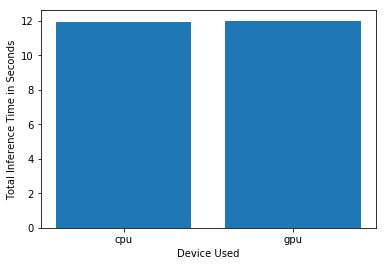

In [97]:
plt.bar(devices[precision], inference_time[precision])
plt.xlabel("Device Used")
plt.ylabel("Total Inference Time in Seconds")
plt.show()

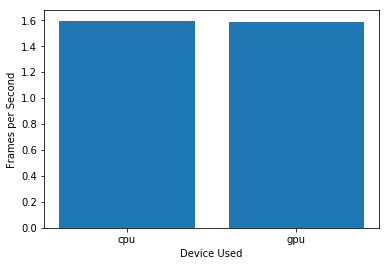

In [98]:
plt.bar(devices[precision], fps[precision])
plt.xlabel("Device Used")
plt.ylabel("Frames per Second")
plt.show()

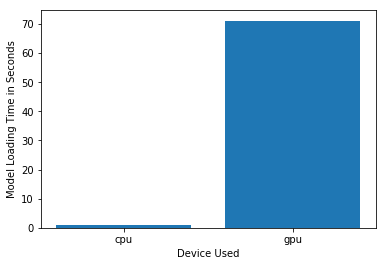

In [99]:
plt.bar(devices[precision], model_load_time[precision])
plt.xlabel("Device Used")
plt.ylabel("Model Loading Time in Seconds")
plt.show()

## FP16

In [100]:
precision = 'FP16'

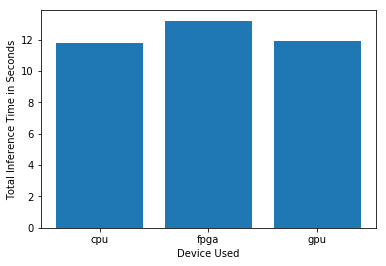

In [101]:
plt.bar(devices[precision], inference_time[precision])
plt.xlabel("Device Used")
plt.ylabel("Total Inference Time in Seconds")
plt.show()

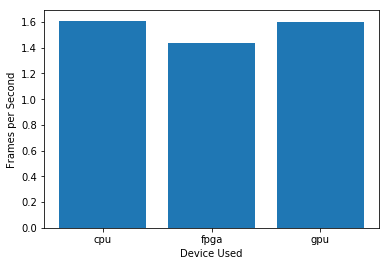

In [102]:
plt.bar(devices[precision], fps[precision])
plt.xlabel("Device Used")
plt.ylabel("Frames per Second")
plt.show()

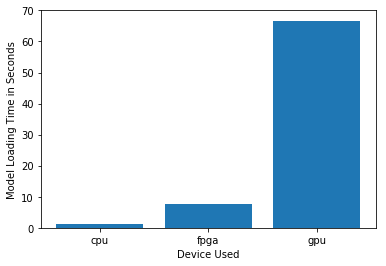

In [103]:
plt.bar(devices[precision], model_load_time[precision])
plt.xlabel("Device Used")
plt.ylabel("Model Loading Time in Seconds")
plt.show()

## FP32

In [104]:
precision = 'FP32'

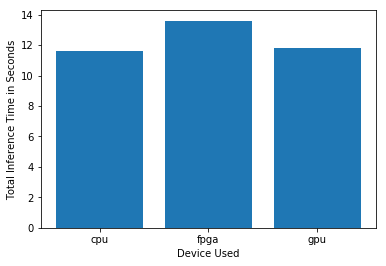

In [105]:
plt.bar(devices[precision], inference_time[precision])
plt.xlabel("Device Used")
plt.ylabel("Total Inference Time in Seconds")
plt.show()

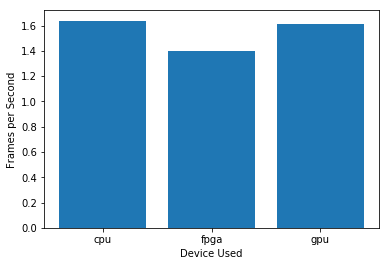

In [106]:
plt.bar(devices[precision], fps[precision])
plt.xlabel("Device Used")
plt.ylabel("Frames per Second")
plt.show()

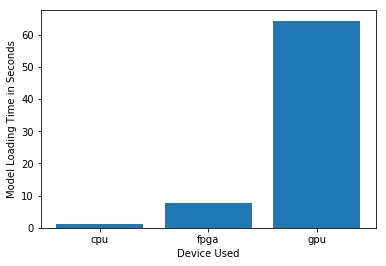

In [107]:
plt.bar(devices[precision], model_load_time[precision])
plt.xlabel("Device Used")
plt.ylabel("Model Loading Time in Seconds")
plt.show()